In [ ]:
+import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt

In [ ]:
import os
from sklearn.model_selection import train_test_split
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

dataset_path = '/content/drive/MyDrive/KIDNEY STONE DETECTION NEW/kaggle/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'
classes = ['Cyst', 'Normal', 'Stone', 'Tumor']

train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')
val_dir = os.path.join(dataset_path, 'valid')

# Create directories for train, test, and validate if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Loop through each class and split images into train, test, and validation sets
for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)

    # Get all the images in the class folder
    images = [image for image in os.listdir(class_dir) if image.endswith(('.jpg', '.png', '.jpeg'))]

    # Split the images into train, test, and validation sets
    train_images, test_val_images = train_test_split(images, test_size=0.4, random_state=42)
    test_images, val_images = train_test_split(test_val_images, test_size=0.5, random_state=42)

    # Create directories for the current class inside train, test, and validate
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)

    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)

    # Move the images to the respective folders for the current class
    for image in train_images:
        src_path = os.path.join(class_dir, image)
        dest_path = os.path.join(train_class_dir, image)
        os.rename(src_path, dest_path)

    for image in test_images:
        src_path = os.path.join(class_dir, image)
        dest_path = os.path.join(test_class_dir, image)
        os.rename(src_path, dest_path)

    for image in val_images:
        src_path = os.path.join(class_dir, image)
        dest_path = os.path.join(val_class_dir, image)
        os.rename(src_path, dest_path)

In [ ]:
train_path = "/content/drive/MyDrive/KIDNEY STONE DETECTION NEW/kaggle/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/train"
test_path = "/content/drive/MyDrive/KIDNEY STONE DETECTION NEW/kaggle/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/test"
valid_path = "/content/drive/MyDrive/KIDNEY STONE DETECTION NEW/kaggle/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/valid"

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the data directories
train_path = '/content/drive/MyDrive/KIDNEY STONE DETECTION NEW/kaggle/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/train'
valid_path = '/content/drive/MyDrive/KIDNEY STONE DETECTION NEW/kaggle/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/valid'
test_path = '/content/drive/MyDrive/KIDNEY STONE DETECTION NEW/kaggle/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/test'

# Create ImageDataGenerators for training, validation, and test sets
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(32, 32), batch_size=12, class_mode='categorical')

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(32, 32), batch_size=12, class_mode='categorical')

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(32, 32), batch_size=5, shuffle=False, class_mode='categorical')


Found 7501 images belonging to 4 classes.
Found 2504 images belonging to 4 classes.
Found 2502 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(4, activation='softmax'))  # Change to 4 units for 4 classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                        

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 6, verbose = 1)

mc = ModelCheckpoint(filepath = 'CNN4.h5', monitor = 'val_accuracy', min_delta = 0.01, patience = 6, verbose = 1, save_best_only = True)

cb = [mc,es]


In [ ]:
history = model.fit(x=train_batches,
                    validation_data=valid_batches,
                    callbacks = cb,
                    epochs=23)

Epoch 1/23
626/626 [==============================] - ETA: 0s - loss: 0.3229 - accuracy: 0.8896
Epoch 1: val_accuracy improved from -inf to 0.90216, saving model to CNN4.h5
626/626 [==============================] - 4415s 7s/step - loss: 0.3229 - accuracy: 0.8896 - val_loss: 0.2280 - val_accuracy: 0.9022
Epoch 2/23


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


626/626 [==============================] - ETA: 0s - loss: 0.1160 - accuracy: 0.9593
Epoch 2: val_accuracy improved from 0.90216 to 0.95767, saving model to CNN4.h5
626/626 [==============================] - 113s 180ms/step - loss: 0.1160 - accuracy: 0.9593 - val_loss: 0.1414 - val_accuracy: 0.9577
Epoch 3/23
626/626 [==============================] - ETA: 0s - loss: 0.0759 - accuracy: 0.9724
Epoch 3: val_accuracy improved from 0.95767 to 0.99561, saving model to CNN4.h5
626/626 [==============================] - 104s 166ms/step - loss: 0.0759 - accuracy: 0.9724 - val_loss: 0.0163 - val_accuracy: 0.9956
Epoch 4/23
626/626 [==============================] - ETA: 0s - loss: 0.0493 - accuracy: 0.9852
Epoch 4: val_accuracy did not improve from 0.99561
626/626 [==============================] - 106s 169ms/step - loss: 0.0493 - accuracy: 0.9852 - val_loss: 0.0559 - val_accuracy: 0.9820
Epoch 5/23
626/626 [==============================] - ETA: 0s - loss: 0.0337 - accuracy: 0.9889
Epoch 5: va

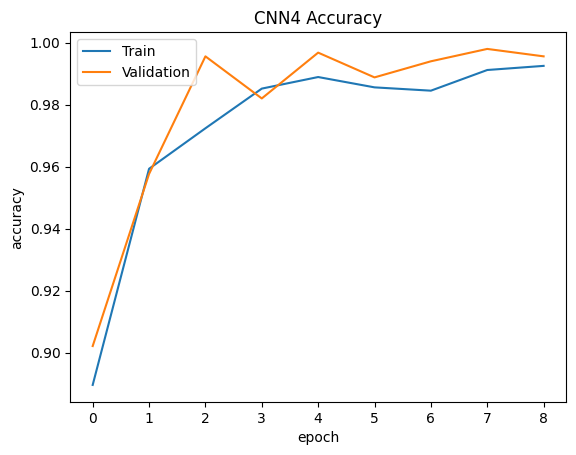

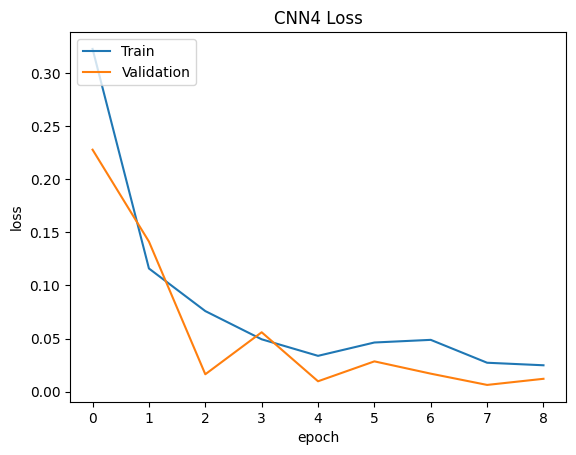

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN4 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN4 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

# load model
model1 = load_model('CNN4.h5')

In [ ]:
test_labels = test_batches.classes
print(test_labels)

[0 0 0 ... 3 3 3]


In [ ]:
pred = model1.predict(x=test_batches)

501/501 [==============================] - 1079s 2s/step


In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=pred.argmax(axis=1))

In [ ]:
test_batches.class_indices

{'Cyst': 0, 'Normal': 1, 'Stone': 2, 'Tumor': 3}

In [ ]:
def plot_cm(cm, classes,
            normalize=False, title='Confusion Matrix',
            cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")

    print(cm)

    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j], horizontalalignment = 'center', color = "white" if cm[i,j]> thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix without normalization
[[ 746    0    0    3]
 [   0 1018    0    3]
 [   0    1  274    0]
 [   0    0    0  457]]


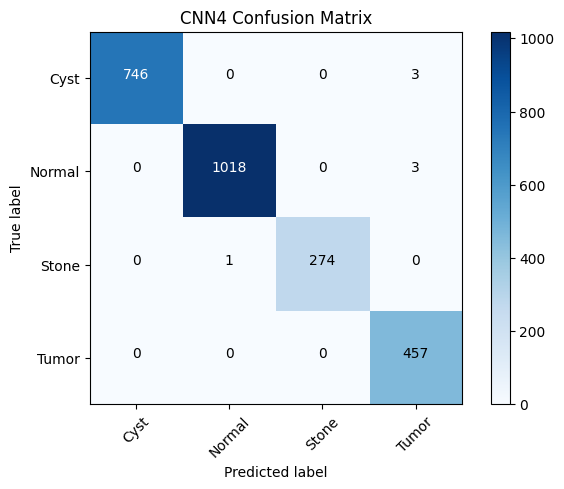

In [ ]:
cm_plot_labels=["Cyst", "Normal","Stone","Tumor"]
plot_cm(cm=cm, classes=cm_plot_labels, title = 'CNN4 Confusion Matrix')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

print("CNN4 Classification Report: \n", classification_report(y_true=test_labels, y_pred=pred.argmax(axis=1)))

CNN4 Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       749
           1       1.00      1.00      1.00      1021
           2       1.00      1.00      1.00       275
           3       0.99      1.00      0.99       457

    accuracy                           1.00      2502
   macro avg       1.00      1.00      1.00      2502
weighted avg       1.00      1.00      1.00      2502



In [ ]:
from sklearn.metrics import accuracy_score

print(100*accuracy_score(test_labels, pred.argmax(axis=1)))

99.72022382094325
